## 📄 Project Summary: 🏏 IPL Player Performance Analysis (EDA)
- **Project Title**: IPL Player Performance Analysis (EDA)
   
### **Objective**
This notebook conducts an in-depth Exploratory Data Analysis (EDA) on the Indian Premier League (IPL) dataset, covering matches and deliveries from 2008 to 2024. The primary goal is to uncover insights into player and team performances, identify top performers, and analyze interesting trends and rivalries over the years
- **Tech Stack**:
  - `Python`, `Pandas`, `Plotly`, `Matplotlib`, `Seaborn`
- **Skills Demonstrated**:
  - Data Cleaning, Grouping, Merging
  - Interactive Visualizations (Dropdowns, Color Encoding)
  - EDA Best Practices
- **Notable Features**:
  - Top batsmen/bowlers by team, venue, season
  - Dropdown-based filtering
  - Batsman-vs-Bowler rivalry insights
### **Dataset**
We are using two primary data files:
- `matches.csv`: Contains match-level information like teams, venue, winner, etc.
- `deliveries.csv`: Provides ball-by-ball data for each match, including batsman, bowler, runs scored, wickets, etc.

You can download the data from [this Kaggle dataset](https://www.kaggle.com/datasets/moumita09/ipl-complete-dataset-2008-2020). *Note: The provided notebook appears to use a more recent version of the dataset.*

### **Analysis Highlights**
1.  **Data Cleaning & Preparation**: Standardizing and cleaning the raw data for accurate analysis.
2.  **Batsman Analysis**: Identifying top run-scorers overall, by team, by season, and at specific venues.
3.  **Wicket Taker Analysis**: Finding the most successful bowlers in the league.
4.  **Venue & Team Insights**: Analyzing match distribution across cities and team performances at different venues.
5.  **Player Rivalries**: A deep dive into classic head-to-head battles between key batsmen and bowlers.

In [3]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.io import write_html
from IPython.display import IFrame

import plotly.graph_objects as go
# Set a consistent style for seaborn plots
sns.set(style="whitegrid")
print("Libraries imported successfully.")


Libraries imported successfully.


# Read the dataset from a CSV file


In [4]:
# Load the datasets from CSV files into pandas DataFrames
# 'matches.csv' contains high-level data about each match
matches = pd.read_csv("..\\data\\matches.csv")
# 'deliveries.csv' contains ball-by-ball data
deliveries = pd.read_csv("..\\data\\deliveries.csv")
print("Data loaded successfully.")

Data loaded successfully.


## 🧹 1. Data Cleaning and Preparation

Before analysis, it's crucial to clean the data to ensure its quality and consistency. This involves:
- Removing duplicate entries.
- Dropping rows with critical missing values (like `winner` or `season`).
- Converting data types (e.g., `date` column to datetime objects).
- Standardizing column names to a consistent format (lowercase with underscores) for easier access.

In [5]:
# Function to clean the matches DataFrame
# This function will handle missing values, duplicates, and standardize column names
def clean_matches(df):
    """Cleans the matches DataFrame."""
    df = df.copy()
    # Remove any duplicate rows
    df.drop_duplicates(inplace=True)
    # Drop rows where essential data like id, season, or winner is missing
    df.dropna(subset=["id", "season", "winner"], inplace=True)
    # Convert the 'date' column to datetime objects for time-based analysis
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df[df['date'].notnull()]
    # Standardize column names to lowercase with underscores for easy access
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df
# Function to clean the deliveries DataFrame
# This function will handle missing values, duplicates, and standardize column names
def clean_deliveries(df):
    """Cleans the deliveries DataFrame."""
    df = df.copy()
    # Remove any duplicate rows
    df.drop_duplicates(inplace=True)
    # Drop rows with essential missing data
    df.dropna(subset=["match_id", "inning", "over", "ball"], inplace=True)
    # Standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

# Apply the cleaning functions to the respective DataFrames
matches = clean_matches(matches)
deliveries = clean_deliveries(deliveries)

print("✅ Data cleaned.")

✅ Data cleaned.


## 📊 2. Overview of the Data

Let's get a quick look at the structure and content of our cleaned datasets to understand their scope.

In [6]:
# Display the dimensions (rows, columns) of the matches DataFrame
print("Matches dataset shape:", matches.shape)

# Display the first few rows of the matches DataFrame to inspect the data
matches.head()

Matches dataset shape: (1090, 20)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


Now lets look at the deliveries dataset


In [7]:
# Display the dimensions and the first few rows of the deliveries DataFrame
print("Deliveries dataset shape:", deliveries.shape)
deliveries.head()

Deliveries dataset shape: (260920, 17)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## 🏆 3. Batsman Performance Analysis

### 📈 Top 10 Run Scorers in IPL History (All Seasons)

This bar chart showcases the top 10 batsmen in terms of total runs scored across all IPL seasons. Using the `deliveries` dataset, we aggregated total runs by each batsman and sorted them in descending order to highlight consistent top performers.

- **Method**: Grouped the ball-by-ball data by `batter` and summed `batsman_runs`.
- **Tool Used**: `Matplotlib` for static visualization.
- **Insight**: This chart helps identify players who have had the biggest impact with the bat throughout IPL history.

> 💡 *Virat Kohli, Shikhar Dhawan, and Rohit Sharma consistently dominate the run charts due to their longevity and performance.*


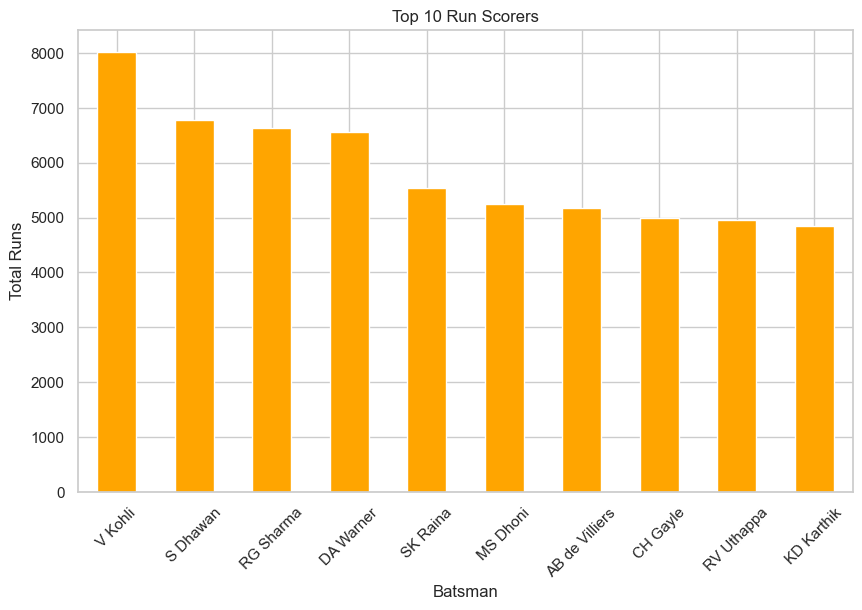

In [8]:
# Group deliveries by 'batter' and sum the 'batsman_runs' to get total runs for each player
top_batsmen = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)

# Create a bar chart using Matplotlib to visualize the top 10 run-scorers
top_batsmen.plot(kind="bar", figsize=(10,6), color='orange', title="Top 10 Run Scorers")
plt.ylabel("Total Runs")
plt.xlabel("Batsman")
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

#### Interactive Plot: Top 10 Run Scorers
To make the visualization more engaging, we'll recreate the same chart using Plotly Express. This provides an interactive experience with tooltips showing exact run counts.

In [9]:
# Aggregate batsman runs and select the top 10
batsman_runs = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10).reset_index()

# Create an interactive bar chart using Plotly Express
fig = px.bar(
    batsman_runs, # DataFrame to use
    x="batter",   # X-axis: Batsman names
    y="batsman_runs", # Y-axis: Total runs
    title="Top 10 Run Scorers in IPL",
    labels={"batsman_runs": "Runs", "batter": "Batsman"}, # Customize axis labels
    color="batsman_runs", # Color bars based on the number of runs
    color_continuous_scale="Viridis" # Set the color scale
)
fig.show()
# write_html(fig, file='interactive_charts/Top_10_Batsmen_Overall.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Batsmen_Overall.html", width='100%', height=550)


> ⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:

📈 [Click here to view the interactive version of this chart (Top 10 Batsmen Overall)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsmen_Overall.html)


### 3.2. 🏏 Top 10 Run Scorers by Team (Interactive Dropdown)

This section introduces an interactive Plotly visualization that displays the **top 10 run-scorers for each IPL team**.

- **Objective**: Understand which batsmen contributed the most runs to each franchise over the years.
- **Approach**:
  - Grouped `deliveries` data by `batting_team` and `batter`.
  - Calculated total runs scored by each batsman for their respective teams.
  - Created an interactive dropdown menu using Plotly to toggle between teams.
- **Tool Used**: `Plotly` (`go.Figure` with `update_layout` and dropdown `buttons`).

> 🎯 *This interactive chart provides a clear view of franchise legends like MS Dhoni (CSK), AB de Villiers (RCB), and Rohit Sharma (MI), showcasing their contribution to their teams.*


### 🔍 Preprocessing:

We start by grouping the dataset based on `batting_team` and `batter` to calculate the total runs scored by each player for their respective teams. This prepares the data for visualizing top performers by team.
We also print the different teams whoever has participated in IPL 

In [10]:
# Pre-computation for the dropdown plot

# Group by batting team and batsman to get total runs
top_per_team = deliveries.groupby(["batting_team", "batter"])["batsman_runs"].sum().reset_index()

# Get a list of all unique teams to create dropdown buttons
teams = top_per_team["batting_team"].unique()
fig = go.Figure()

print(f"Teams found: {teams}")

Teams found: ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Gujarat Titans' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Lucknow Super Giants'
 'Mumbai Indians' 'Pune Warriors' 'Punjab Kings' 'Rajasthan Royals'
 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Royal Challengers Bengaluru'
 'Sunrisers Hyderabad']


### 📊 Create Individual Team Charts

For each team, we add a separate bar chart (`trace`) showing the top 10 batsmen by total runs. Only the first team's chart is visible initially — others are hidden and will be toggled via the dropdown.


In [11]:
# Create a Plotly figure with a dropdown menu to show top scorers for each team

# Iterate through each team to create a separate bar chart (trace)
for team in teams:
    # Filter the data for the current team and get the top 10 batsmen
    team_df = top_per_team[top_per_team["batting_team"] == team].sort_values("batsman_runs", ascending=False).head(10)
    hover_text = [
        f"Batsman: {b}<br>Runs: {r}<br>Team: {t}"
        for b, r, t in zip(team_df['batter'], team_df['batsman_runs'], team_df['batting_team'])
    ]
    # Add a bar trace for the current team to the figure
    fig.add_trace(go.Bar(
        x=team_df["batter"],
        y=team_df["batsman_runs"],
        name=team,
        hovertext=hover_text,
        hoverinfo='text',
        visible=(team == teams[0])  # Only the first team's trace is visible initially
    ))

# Create the dropdown buttons


# Add the dropdown menu to the figure's layout
print("Done")

Done


### 🧠 Define Dropdown Buttons for Team Selection

Each button corresponds to a team and controls which trace (bar chart) is visible. This interactivity helps users explore data team-wise without clutter.


In [12]:
# CREATE THE DROPDOWN BUTTONS


dropdown_buttons = []
for i, team in enumerate(teams):
    # Create a visibility list. 'True' for the selected team, 'False' for others.
    visible = [False] * len(teams)
    visible[i] = True
    
    # Append a button configuration to the list
    dropdown_buttons.append(dict(
        label=team, # Button label
        method="update", # Method to execute on click
        args=[{"visible": visible}, # Sets trace visibility
              {"title": f"Top 10 Run Scorers for {team}"}] # Updates the chart title
    ))
print("Dropdown buttons created.")

Dropdown buttons created.


### 🚀 Final Interactive Chart: Top Run Scorers by Team

We integrate all team-wise bar charts into a single interactive dashboard using Plotly. Dropdown lets you switch between teams and explore their top performers.


In [13]:
# Add the dropdown menu to the figure's layout

fig.update_layout(
    updatemenus=[dict(
        active=0, # The first button is active by default
        buttons=dropdown_buttons,
        x=0.5, xanchor="center",
        y=1.15, yanchor="top"
    )],
    title=f"Top 10 Run Scorers for {teams[0]}", # Initial title
    xaxis_title="Batter",
    yaxis_title="Runs"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Batsmen_By_Team.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Batsmen_By_Team.html", width='100%', height=550)



> ⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Batsmen by team)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsmen_By_Team.html)


### 3.3. Top 10 Run Scorers by Season

In this section, we analyze the top-performing batsmen for each individual IPL season.

By merging delivery-level data with match-level season information, we calculate the total runs scored by each batsman in every season. An interactive dropdown menu is used to display the **Top 10 Run Scorers** for each year, allowing for a year-wise comparison of player performance.

This visualization helps identify consistent performers across seasons as well as breakthrough players in specific years.


#### Step 1: Merge deliveries with matches to include the 'season' column

We need season-level data to calculate how many runs each batsman scored in each season. So, we join the `deliveries` DataFrame with the `matches` DataFrame on `match_id`.


In [14]:
# Merge season data from matches into the deliveries dataset
Batsman_seasons = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
Batsman_seasons.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,id,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,335982,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,335982,2007/08
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,335982,2007/08


#### Step 2: Group by season and batsman to get total runs

After merging, we group the data by `season` and `batter` to get the total runs scored by each batsman in each season.


In [15]:
batsman_season_stats = Batsman_seasons.groupby(['season', 'batter','batting_team'])['batsman_runs'].sum().reset_index()
batsman_season_stats.head()

,season,batter,batting_team,batsman_runs
0,2007/08,A Chopra,Kolkata Knight Riders,42
1,2007/08,A Kumble,Royal Challengers Bangalore,13
2,2007/08,A Mishra,Delhi Daredevils,37
3,2007/08,A Mukund,Chennai Super Kings,0
4,2007/08,A Nehra,Mumbai Indians,3


#### Step 3: Sort batsmen by runs within each season and extract all unique seasons

This ensures that we display the top 10 run-scorers per season in descending order. We also get the list of all seasons for dropdown creation.


In [16]:
batsman_season_stats = batsman_season_stats.sort_values(['season', 'batsman_runs'], ascending=[True, False])
seasons = batsman_season_stats['season'].unique()
print(f"Total seasons: {seasons.shape[0]}")
print(f"Seasons found: {seasons}")


Total seasons: 17
Seasons found: ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


#### Step 4: Generate dropdown buttons and add traces

For each season, we extract the top 10 batsmen and add them as individual traces to a Plotly bar chart. We then add a dropdown menu to let users select a season interactively.


In [17]:
# Initialize figure
fig = go.Figure()
buttons = []

# Build chart
for season in seasons:
    season_df = batsman_season_stats[batsman_season_stats['season'] == season].head(10)

    fig.add_trace(go.Bar(
        x=season_df['batter'],
        y=season_df['batsman_runs'],
        name=str(season),
        marker_color='orange',
        # Set visibility for the first season only
        hovertext=season_df['batting_team'],  # ✅ You can include team here for tooltips
        visible=(season == seasons[0])  # Only first season visible by default
    ))

    # Button for dropdown
    visibility = [s == season for s in seasons]
    buttons.append(dict(
        label=str(season),
        method="update",
        args=[
            {"visible": visibility},
            {"title": f"Top 10 Batsmen for {season}"}
        ]
    ))
print("Done")

Done


#### Step 5: Configure layout and show the figure

We finalize the layout by adding the dropdown menu, setting axis labels, and showing the chart.


In [18]:
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top",
            direction="down"
        )
    ],
    title=f"Top 10 Batsmen for {seasons[0]}",
    xaxis_title="Batter",
    yaxis_title="Runs"
)
# write_html(fig, file='interactive_charts/Top_10_Batsmen_By_Season.html', full_html=True)
fig.show()
# IFrame(src="interactive_charts/Top_10_Batsmen_By_Season.html", width='100%', height=550)


> ⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Batsmen by team and season wise)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsmen_By_Season.html)


### 3.4. Top 10 Batsmen by Season and Team
This analysis adds another layer of granularity by looking at the top 10 batsmen for each team in a specific season. This is useful for understanding player form and impact in particular years.
This interactive section allows us to explore **the top 10 batsmen** for **each IPL team in a specific season**. 
Key objectives:
- Understand which players contributed the most for their teams in different seasons.
- Visualize temporal performance trends.
- Empower exploration through an interactive dropdown interface combining **team and season**.

The logic is broken down into clean steps below.


#### 🔗 Step 1: Add Season Info to Deliveries

To perform season-wise analysis, we first merge the `deliveries` dataset with the `matches` dataset to bring in the `season` column for each delivery.


In [19]:
    # Merge deliveries with matches to get season information for each delivery    
grouped = deliveries.merge(matches[["id", "season"]], left_on="match_id", right_on="id")
print("Data merged successfully.")

Data merged successfully.


#### 📈 Step 2: Group and Aggregate Runs

We group by `season`, `batting_team`, and `batter` to compute the **total runs scored** by each batsman for every team-season pair.


In [20]:
  # Group by season, team, and batter to get total runs
batsman_stats = grouped.groupby(["season", "batting_team", "batter"])["batsman_runs"].sum().reset_index()
print("Batsman stats grouped by season, team, and batter.")

Batsman stats grouped by season, team, and batter.


#### 🧩 Step 3: Prepare Dropdown Values

Extract all unique seasons and teams to dynamically build dropdown buttons for filtering plots.


In [21]:
# Prepare sorted lists of seasons and teams for creating dropdowns
seasons = sorted(batsman_stats['season'].unique())
teams = sorted(batsman_stats['batting_team'].unique())
print(f"Seasons found: {seasons}")
print(f"Teams found: {teams}")


Seasons found: ['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']
Teams found: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']


#### 🔄 Step 4: Create Traces for All Team-Season Pairs

We iterate through each season-team combination and add a bar trace for the **top 10 batsmen**. Only the first trace is visible initially — rest are hidden and toggled via dropdown.


In [22]:
# Initialize the figure and lists for buttons and visibility
fig = go.Figure()
buttons = []
visibility = []
trace_index = 0

# Generate one bar chart (trace) for each unique combination of team and season
for season in seasons:
    for team in teams:
        # Filter data for the specific season and team
        df_filtered = batsman_stats[
            (batsman_stats['season'] == season) & 
            (batsman_stats['batting_team'] == team)
        ].sort_values('batsman_runs', ascending=False).head(10)

        # The first trace is visible by default, others are hidden
        visible = (season == seasons[0] and team == teams[0])
        
        # Add the trace to the figure
        fig.add_trace(go.Bar(
            x=df_filtered['batter'],
            y=df_filtered['batsman_runs'],
            name=f"{team} ({season})",
            visible=visible
        ))
        visibility.append(visible)
        trace_index += 1

print("Done")

Done


#### 🎛️ Step 5: Configure Dropdown Buttons

Each button allows toggling between different team-season combinations, showing only the relevant chart. Makes the chart highly interactive and scalable.


In [23]:
# Create a button for each season-team combination
for s_index, season in enumerate(seasons):
    for t_index, team in enumerate(teams):
        index = s_index * len(teams) + t_index
        vis = [False] * trace_index # Start with all traces hidden
        vis[index] = True # Make only the relevant trace visible

        buttons.append(dict(
            label=f"{team} ({season})",
            method="update",
            args=[
                {"visible": vis},
                {"title": f"Top 10 Batsmen for {team} ({season})"}
            ]
        ))
print("Dropdown buttons created.")

Dropdown buttons created.


#### 🚀 Step 6: Render the Interactive Plot

We apply the dropdown and display the final chart using Plotly. Users can now explore the **top 10 batsmen** across any season and any team with just a click!


In [24]:
# Update the layout with the dropdown menu and titles
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons, 
        x=0.5, xanchor="center",
        y=1.2, yanchor="top",
        direction="down"
    )],
    title="Top 10 Batsmen for Team and Season",
    xaxis_title="Batsman",
    yaxis_title="Runs"
)
fig.show()
# write_html(fig, file='interactive_charts/Top_10_Batsmen_By_Team_Season.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Batsmen_By_Team_Season.html", width='100%', height=550)



⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Batsmen by team and season wise)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsmen_By_Team_Season.html)


### 3.5. Top 10 Batsmen by Venue
Different grounds can favor different players. This analysis shows which batsmen have dominated at specific venues. A dropdown allows for filtering by each stadium.
This section identifies the **top 10 batsmen at each IPL venue**, helping analyze player performance across different grounds.

🔍 **Objective:**
- Highlight stadium-specific performance trends.
- Enable dynamic comparison of players across venues.

An interactive dropdown allows the user to select a stadium and view the best-performing batsmen there.


#### 🔗 Step 1: Combine Venue Data

We merge `deliveries` with `matches` to associate each ball with the venue where it was played.


In [25]:
# Merge deliveries and matches to link deliveries to venues
merged_df = deliveries.merge(matches[['id', 'venue']], left_on='match_id', right_on='id')
print("Data merged successfully.")

Data merged successfully.


#### 📊 Step 2: Compute Batsman Runs by Venue

We group by `venue` and `batter` to compute total runs each player has scored at each ground.


In [26]:

# Group by venue and batsman to get total runs scored at each venue
venue_batsmen = merged_df.groupby(['venue', 'batter'])['batsman_runs'].sum().reset_index()
print("Venue and batsman data grouped successfully.")


Venue and batsman data grouped successfully.


#### 📋 Step 3: Preview Venues

List all unique venues where IPL matches have been played. This will be used to build dropdown filter options.


In [27]:
# Sort the DataFrame to get the top 10 batsmen for each venue
# Get a list of unique venues for the dropdown
venues = venue_batsmen['venue'].unique()
print(f"Total venues: {venues.shape[0]}")
print(f"Venues found: {venues}")

Total venues: 58
Venues found: ['Arun Jaitley Stadium' 'Arun Jaitley Stadium, Delhi' 'Barabati Stadium'
 'Barsapara Cricket Stadium, Guwahati'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Brabourne Stadium' 'Brabourne Stadium, Mumbai' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr DY Patil Sports Academy, Mumbai'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Dubai International Cricket Stadium' 'Eden Gardens'
 'Eden Gardens, Kolkata' 'Feroz Shah Kotla' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M Chinnaswamy Stadium, Bengaluru'
 'M.Chinnaswamy Stadium' 'MA Chidambaram Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Maharaja Yadavindr

#### 🎨 Step 4: Add Traces per Venue

We iterate over each venue and create a trace showing the top 10 batsmen based on total runs scored at that ground.


In [28]:
# Initialize figure and buttons list
fig = go.Figure()
buttons = []

# Build a trace for each venue
for i, venue in enumerate(venues):
    # Filter for the current venue and get top 10 batsmen
    top_batsmen = venue_batsmen[venue_batsmen['venue'] == venue]\
                    .sort_values('batsman_runs', ascending=False)\
                    .head(10)

    # Add a bar trace for the venue, visible only if it's the first one
    fig.add_trace(go.Bar(
        x=top_batsmen['batter'],
        y=top_batsmen['batsman_runs'],
        name=venue,
        visible=(i == 0)
    ))

    # Create the visibility array for the dropdown
    vis = [False] * len(venues)
    vis[i] = True

    # Create the button for the dropdown
    buttons.append(dict(
        label=venue,
        method="update",
        args=[
            {"visible": vis},
            {"title": f"Top 10 Batsmen at {venue}"}
        ]
    ))
    
print("Dropdown buttons created.")

Dropdown buttons created.


#### 🔽 Step 5: Add Dropdown for Venue Selection

We finalize the chart by integrating the dropdown, letting users select any stadium to view top run scorers there.


In [29]:
# Update the layout of the figure with the dropdown menu and titles
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            active=0,
            x=0.5, xanchor="center",
            y=1.15, yanchor="top",
            direction="down"
        )
    ],
    title=f"Top 10 Batsmen at {venues[0]}", # Set initial title
    xaxis_title="Batsman",
    yaxis_title="Runs"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Batsmen_By_Venue.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Batsmen_By_Venue.html", width='100%', height=550)


⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Batsmen on each venue)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsmen_By_Venue.html)


## 🎯 4. Top Wicket Takers Analysis

### 🎯 4.1. Top 10 Wicket Takers in IPL History

Just as batsmen accumulate runs, bowlers leave their mark by taking wickets — a crucial metric of bowling impact.

📌 **Objective:**  
To identify the **top 10 all-time leading wicket-takers** in the IPL by analyzing dismissals credited directly to bowlers.

🧮 **Methodology:**  
- We filter out only the legitimate dismissals where the bowler gets credit (e.g., bowled, caught, lbw, etc.).
- Then, we count total dismissals per bowler.
- A **bar chart** visualizes the top 10 based on this metric.

This gives a clear picture of the most dominant bowlers in IPL history.


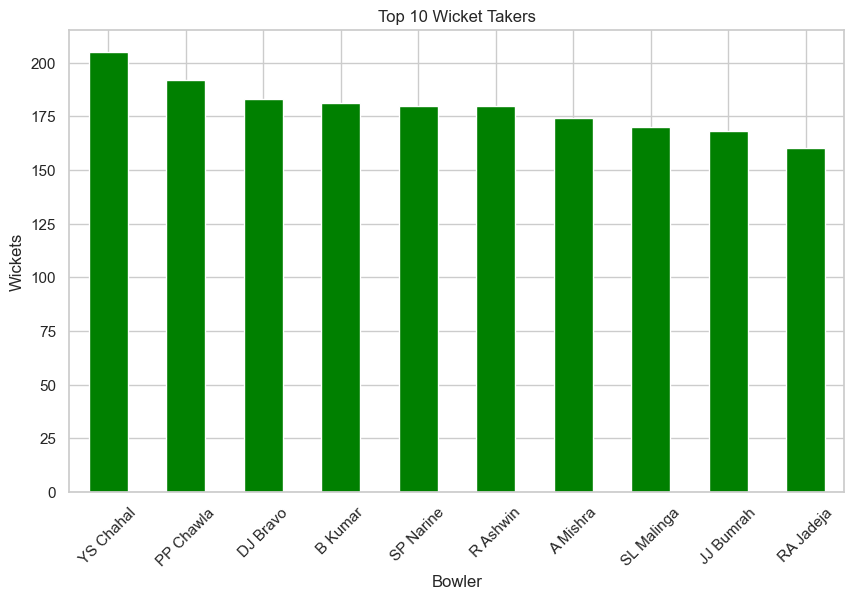

In [61]:
    # Filter for deliveries that resulted in a legitimate wicket credited to the bowler
wickets = deliveries[deliveries.dismissal_kind.isin(["bowled", "caught", "lbw", "stumped", "caught and bowled"])]

    # Group by 'bowler' and count the number of dismissals
top_bowlers = wickets.groupby("bowler").count()["player_dismissed"].sort_values(ascending=False).head(10)

    # Create a bar chart using Matplotlib to visualize the top 10 wicket-takers
top_bowlers.plot(kind="bar", figsize=(10,6), color='green', title="Top 10 Wicket Takers")
plt.ylabel("Wickets")
plt.xlabel("Bowler")
plt.xticks(rotation=45)
plt.show()

#### Interactive Plot: Top 10 Wicket Takers
An interactive version of the wicket-takers chart using Plotly.

In [62]:
# Aggregate wicket data for the top 10 bowlers
top_bowlers = wickets.groupby("bowler").count()["player_dismissed"].sort_values(ascending=False).head(10).reset_index()

# Create an interactive bar chart with Plotly Express
fig = px.bar(
    top_bowlers,
    x="bowler",
    y="player_dismissed",
    title="Top 10 Wicket Takers in IPL",
    labels={"player_dismissed": "Wickets", "bowler": "Bowler"},
    color="player_dismissed",
    )
fig.show()
# write_html(fig, file='interactive_charts/Top_10_Bowlers_Overall.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Bowlers_Overall.html", width='100%', height=550)



⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Wicket takers)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Bowlers_Overall.html)


### 🎯 4.2. Top 10 Wicket Takers by IPL Team

This section highlights the **top 10 bowlers** for each IPL team based on the number of wickets taken.

📌 **Objective:**  
Identify the key wicket-takers across different franchises and provide an interactive way to explore them team-wise.

🧮 **Methodology:**  
- Filter out legitimate bowler dismissals (already done earlier).
- Group the data by `bowling_team` and `bowler` to count the total dismissals.
- For each team, identify the **top 10 wicket-takers**.
- Use a dropdown-based interactive Plotly chart to display results per team.

🔽 The dropdown menu allows viewers to **select a team** and view its leading bowlers in IPL history.


#### 📌 Step 1: Grouping by Team & Bowler
We group the dataset to find out **how many wickets each bowler has taken for each team**.


In [33]:
# Group by team and bowler to get total wickets per player
top_per_team = wickets.groupby(["bowling_team", "bowler"])["player_dismissed"].count().reset_index()
top_per_team.head()



,bowling_team,bowler,player_dismissed
0,Chennai Super Kings,A Flintoff,2
1,Chennai Super Kings,A Nehra,30
2,Chennai Super Kings,AS Rajpoot,1
3,Chennai Super Kings,Akash Singh,5
4,Chennai Super Kings,B Laughlin,1


#### 📌 Step 2: Get All Unique Teams
We fetch the list of unique IPL teams and initialize a blank Plotly figure to populate later.


In [34]:
# Extract all unique teams
teams = top_per_team["bowling_team"].unique()
fig = go.Figure()
print(f"Total teams: {teams.shape[0]}")
print(f"Teams found: {teams}")


Total teams: 19
Teams found: ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Gujarat Titans' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Lucknow Super Giants'
 'Mumbai Indians' 'Pune Warriors' 'Punjab Kings' 'Rajasthan Royals'
 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Royal Challengers Bengaluru'
 'Sunrisers Hyderabad']


#### 📌 Step 3: Add Top 10 Bowlers per Team
For each team, we sort the bowlers by their wicket count and **add them as a separate trace** in the figure.
Only the first team is set to visible initially.


In [35]:
# Add one trace per team showing top 10 wicket takers
for team in teams:
    team_df = top_per_team[top_per_team["bowling_team"] == team]\
                .sort_values("player_dismissed", ascending=False).head(10)
    
    fig.add_trace(go.Bar(
        x=team_df["bowler"],
        y=team_df["player_dismissed"],
        name=team,
        visible=(team == teams[0])  # Show only the first team initially
    ))
print("Done")


Done


#### 📌 Step 4: Generate Dropdown Buttons
Each button corresponds to a team and controls which bar trace is visible based on the selected team.


In [36]:
# Create dropdown buttons for each team
dropdown_buttons = []
for i, team in enumerate(teams):
    visible = [False] * len(teams)
    visible[i] = True

    dropdown_buttons.append(dict(
        label=team,
        method="update",
        args=[{"visible": visible},
              {"title": f"Top 10 Wicket Takers for {team}"}]
    ))
print("Dropdown buttons created.")


Dropdown buttons created.


#### 📌 Step 5: Render Interactive Dropdown Chart
This cell sets up the dropdown and axis titles and renders the interactive visualization.


In [37]:
# Finalize layout with dropdown and show the figure
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title=f"Top 10 Wicket Takers for {teams[0]}",
    xaxis_title="Bowler",
    yaxis_title="Wickets"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Bowlers_By_Team.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Bowlers_By_Team.html", width='100%', height=550)




⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 wicket takers for that team)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Bowlers_By_Team.html)


### 🎯 4.3. Top 10 Wicket Takers by IPL Seasons
This section identifies the top 10 bowlers in each IPL season based on the number of wickets taken. The analysis allows recruiters and analysts to:

- Track bowling performance evolution season-wise.
- Understand seasonal dominance and form.
- Use an interactive dropdown to toggle between seasons.

Each dropdown selection displays a horizontal bar chart of the top wicket-takers for that season, along with tooltips revealing which team each bowler represented.

#### 🛠️ Step 1: Combine Wickets Data with Season

We first merge the `wickets` dataframe with the `matches` dataframe to fetch the `season` for each delivery.


In [38]:
# Merge wickets data with match season info
bowler_season_stats = wickets.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
print("Data merged successfully.")


Data merged successfully.


#### 📈 Step 2: Aggregate Wicket Stats per Season

Here, we:
- Group by `season`, `bowler`, and `bowling_team`.
- Count the number of dismissals for each bowler.
- Sort the data to allow easy extraction of top 10 bowlers per season.


In [39]:
# Group by season, bowler, and team, and count dismissals
bowler_season_stats = bowler_season_stats.groupby(['season', 'bowler', 'bowling_team'])['player_dismissed'].count().reset_index()

# Sort to get top bowlers within each season
bowler_season_stats = bowler_season_stats.sort_values(['season', 'player_dismissed'], ascending=[True, False])
print("Bowler stats grouped by season, team, and bowler.")


Bowler stats grouped by season, team, and bowler.


#### 🔎 Step 3: Explore Seasons in Data

We extract all available IPL seasons in the dataset, which helps us dynamically create the dropdown filter.


In [40]:
# Get unique seasons for dropdown
seasons = bowler_season_stats['season'].unique()
print(f"Total seasons: {seasons.shape[0]}")
print(f"Seasons found: {seasons}")


Total seasons: 17
Seasons found: ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


#### 🧮 Step 4: Build Traces and Dropdown Buttons

We loop through each season:
- Extract top 10 bowlers.
- Create a trace (bar chart) per season.
- Add a button to toggle visibility using Plotly’s `updatemenus`.


In [41]:
# Initialize figure and dropdown buttons
fig = go.Figure()
buttons = []

# Build chart traces season-wise
for season in seasons:
    # Filter for the current season and get top 10 bowlers
    season_df = bowler_season_stats[bowler_season_stats['season'] == season].head(10)

    fig.add_trace(go.Bar(
        x=season_df['bowler'],
        y=season_df['player_dismissed'],
        name=str(season),
        marker_color='green',
        visible=(season == seasons[0]),  # Show only first by default
        hovertext=season_df['bowling_team']  # Show team in hover
    ))

    # Dropdown visibility config
    vis = [False] * len(seasons)
    vis[list(seasons).index(season)] = True

    buttons.append(dict(
        label=str(season),
        method="update",
        args=[
            {"visible": vis},
            {"title": f"Top 10 Wicket Takers for {season}"}
        ]
    ))
print("Done")


Done


#### 🎨 Step 5: Finalize Layout and Show Chart

We apply the dropdown menu to the chart, label axes, and render the interactive figure for user selection.


In [42]:
# Final layout with dropdown integration
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top",
            direction="down"
        )
    ],
    title=f"Top 10 Wicket Takers for {seasons[0]}",
    xaxis_title="Bowler",
    yaxis_title="Wickets"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Bowlers_By_Season.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Bowlers_By_Season.html", width='100%', height=550)



⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Bowler of each season)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Bowlers_By_Season.html)


### 🎯 4.4. Top 10 Wicket Takers by Team and Season

This section helps us explore which bowlers led their teams across different IPL seasons in terms of total wickets taken.

📌 **Objective:**  
- Show an interactive chart of top 10 bowlers for each team across all IPL seasons.

🧮 **Approach:**
1. Merge delivery data with season info from matches.
2. Group by `season`, `bowling_team`, and `bowler` to compute total wickets.
3. Generate dynamic Plotly traces using dropdowns for all valid (team, season) combinations.


#### 🧱 Step 1: Prepare Wicket Data Per Season and Team
We merge match season info into deliveries and then group to calculate total wickets by each bowler per team per season.


In [43]:
# Merge deliveries with season info
grouped = deliveries.merge(matches[["id", "season"]], left_on="match_id", right_on="id")

# Group by season, team, and bowler to count dismissals
wicket_stats = grouped.groupby(["season", "bowling_team", "bowler"])["player_dismissed"].count().reset_index()
print(wicket_stats.head())


    season         bowling_team           bowler  player_dismissed
0  2007/08  Chennai Super Kings    CK Kapugedera                 0
1  2007/08  Chennai Super Kings        JA Morkel                20
2  2007/08  Chennai Super Kings         JDP Oram                 6
3  2007/08  Chennai Super Kings  Joginder Sharma                 9
4  2007/08  Chennai Super Kings         L Balaji                11


#### 🧱 Step 2: Extract Unique Seasons and Teams
We fetch unique values to use as dropdown filter options later.


In [44]:
# Sort for consistent dropdown display
seasons = sorted(wicket_stats['season'].unique())
teams = sorted(wicket_stats['bowling_team'].unique())

print(f"Seasons found: {seasons}")
print(f"Teams found: {teams}")


Seasons found: ['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023', '2024']
Teams found: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']


#### 🧱 Step 3: Filter Valid (Season, Team) Combinations
We only create dropdowns for combinations that actually exist in the data.


In [45]:
fig = go.Figure()
buttons = []
trace_index = 0

# Limit to valid season-team pairs
valid_combinations = wicket_stats.groupby(["season", "bowling_team"])\
                                 .size()\
                                 .reset_index()\
                                 .rename(columns={0: "count"})
print(f"Valid combinations found: {valid_combinations.shape[0]}")


Valid combinations found: 146


#### 🧱 Step 4: Add Dynamic Traces and Buttons
We loop through each valid (season, team) pair to build interactive traces for the dropdown.


In [46]:
for i, row in valid_combinations.iterrows():
    season = row["season"]
    team = row["bowling_team"]

    # Get top 10 bowlers for this team & season
    df_filtered = wicket_stats[
        (wicket_stats['season'] == season) &
        (wicket_stats['bowling_team'] == team)
    ].sort_values('player_dismissed', ascending=False).head(10)

    # Add bar trace
    fig.add_trace(go.Bar(
    x=df_filtered['bowler'],
    y=df_filtered['player_dismissed'],
    name=f"{team} ({season})",
    visible=(i == 0),
    marker=dict(color=df_filtered['player_dismissed'], colorscale='Viridis'),
    hovertemplate=
        "<b>%{x}</b><br>" +
        "Wickets: %{y}<br>" +
        f"Team: {team}<br>" +
        f"Season: {season}<extra></extra>"
))


    # Build visibility config
    vis = [False] * len(valid_combinations)
    vis[i] = True

    # Add button
    buttons.append(dict(
        label=f"{team} ({season})",
        method="update",
        args=[
            {"visible": vis},
            {"title": f"Top 10 Wicket Takers for {team} ({season})"}
        ]
    ))
print("Dropdown buttons created.")

Dropdown buttons created.


#### 🧱 Step 5: Render the Final Interactive Dropdown
The final step is to display the chart with dropdown to explore wicket leaders across teams and seasons.


In [47]:
# Add dropdown and finalize layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            active=0,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top",
            direction="down"
        )
    ],
    title="Top 10 Wicket Takers for Team and Season",
    xaxis_title="Bowler",
    yaxis_title="Wickets"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Bowlers_By_Team_Season.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Bowlers_By_Team_Season.html", width='100%', height=550)




⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 wicket takers of a team in a season)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Bowlers_By_Team_Season.html)


### 🏟️ 4.5. Top 10 Wicket Takers by Venue

This section analyzes the **top-performing bowlers** at each IPL venue based on the number of wickets taken.

📌 **Objective:**  
- For each venue, identify the bowlers with the highest number of dismissals.
- Enable dropdown-based filtering to switch between different stadiums.

🧮 **Approach:**
1. Merge match venue data with delivery-level stats.
2. Group by venue and bowler to count total dismissals.
3. Generate interactive bar charts with Plotly and venue-wise dropdown filters.


#### 🧱 Step 1: Merge Match Data for Venue Info  
We add `venue` information to each delivery to analyze bowler performance per stadium.


In [48]:
# Merge match venue info into deliveries
merged_de = deliveries.merge(matches[["id", "venue"]], left_on="match_id", right_on="id")
print("Data merged successfully.")


Data merged successfully.


#### 🧱 Step 2: Group Data to Get Total Wickets Per Venue  
Now we group by `venue` and `bowler` to determine top wicket takers at each stadium.


In [49]:
# Group by venue and bowler to count total dismissals
venue_bowlers = merged_de.groupby(['venue', 'bowler','bowling_team'])['player_dismissed'].count().reset_index()

# Get unique venues for dropdowns
venues = venue_bowlers['venue'].unique()

# Debug prints
print(f"Total venues: {venues.shape[0]}")
print(f"Venues found: {venues}")


Total venues: 58
Venues found: ['Arun Jaitley Stadium' 'Arun Jaitley Stadium, Delhi' 'Barabati Stadium'
 'Barsapara Cricket Stadium, Guwahati'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow'
 'Brabourne Stadium' 'Brabourne Stadium, Mumbai' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr DY Patil Sports Academy, Mumbai'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'
 'Dubai International Cricket Stadium' 'Eden Gardens'
 'Eden Gardens, Kolkata' 'Feroz Shah Kotla' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium'
 'Himachal Pradesh Cricket Association Stadium, Dharamsala'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M Chinnaswamy Stadium, Bengaluru'
 'M.Chinnaswamy Stadium' 'MA Chidambaram Stadium'
 'MA Chidambaram Stadium, Chepauk'
 'MA Chidambaram Stadium, Chepauk, Chennai'
 'Maharaja Yadavindr

#### 🧱 Step 3: Create Venue-Specific Traces  
We create a separate bar chart trace for each stadium, highlighting the top 10 bowlers at that ground.


In [50]:
fig = go.Figure()
buttons = []

# Create a trace for each venue
for i, venue in enumerate(venues):
    top_bowlers = venue_bowlers[venue_bowlers['venue'] == venue]\
        .sort_values('player_dismissed', ascending=False)\
        .head(10)

    fig.add_trace(go.Bar(
    x=top_bowlers['bowler'],
    y=top_bowlers['player_dismissed'],
    name=venue,
    visible=(i == 0),
    marker_color='seagreen',  # optional: customize color
    hovertemplate=
        "<b>%{x}</b><br>" +
        "Wickets: %{y}<br>" +
        f"Venue: {venue}<extra></extra>"
        f"Bowling Team: {top_bowlers['bowling_team'].iloc[0]}"  # Show team in hover
))


    vis = [False] * len(venues)
    vis[i] = True

    buttons.append(dict(
        label=venue,
        method="update",
        args=[
            {"visible": vis},
            {"title": f"Top 10 Wicket Takers at {venue}"}
        ]
    ))
print("Dropdown buttons created.")


Dropdown buttons created.


#### 🧱 Step 4: Render the Interactive Dropdown  
We finalize the figure layout and attach a dropdown to switch between venues.


In [51]:
# Add dropdown and finalize layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            active=0,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top",
            direction="down"
        )
    ],
    title=f"Top 10 Wicket Takers at {venues[0]}",
    xaxis_title="Bowler",
    yaxis_title="Wickets"
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Bowlers_By_Venue.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Bowlers_By_Venue.html", width='100%', height=550)




⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 wicket takers of that stadium)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Bowlers_By_Venue.html)


## 🗺️ 5. Venue and City Analysis
This section focuses on the geographical dimension of the IPL — analyzing **where** the matches were played and **how often teams appeared** in those cities.



### 🔹 5.1 Cities with the Most Matches Hosted
We begin by identifying which cities have been the most active hosts in IPL history. This gives insight into the most popular venues and how hosting has evolved over the seasons.

- **Metric**: Number of matches hosted in each city.
- **Chart Type**: Static bar chart.
- **Insight**: Reveals top cricketing hubs like Mumbai, Chennai, Kolkata, etc.

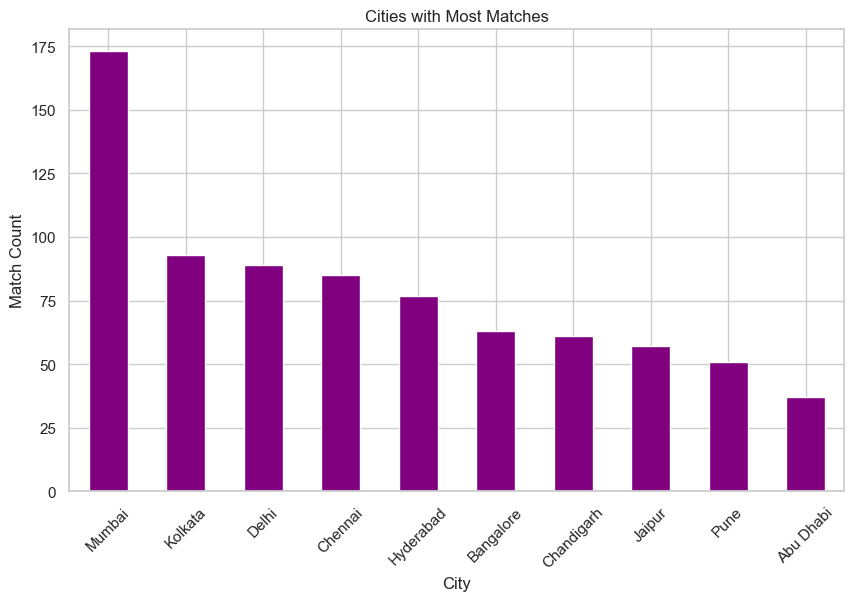

In [182]:
# Count the number of matches in each city and select the top 10
city_match_counts = matches['city'].value_counts().head(10)

# Create a bar chart to show the cities with the most matches
city_match_counts.plot(kind="bar", figsize=(10,6), color='purple', title="Cities with Most Matches")
plt.ylabel("Match Count")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

### 5.2 Team Appearances by City

This interactive visualization allows us to explore how frequently different IPL teams have played matches in each city.

#### 🔍 What We’re Analyzing:
- Every instance a team appeared in a match (as either `team1` or `team2`) in a given city.
- We aggregate these counts to calculate how many total matches each team has played in each city.

#### ⚙️ How It Works:
- We first group matches separately by `team1` and `team2`, then merge and aggregate them into a unified DataFrame.
- Each city gets a dedicated trace (bar chart) in the dropdown.
- The dropdown menu allows users to select a city and view the teams with the most appearances there.

#### 📊 Insights You Can Extract:
- Which teams have had the strongest presence in popular cities like **Mumbai**, **Chennai**, **Delhi**, etc.
- Understand neutral venues and how teams were distributed in cities during special seasons (e.g., UAE-hosted IPL seasons).
- Identify historical home bases or major hubs for different franchises.

This chart is helpful for venue-based fan engagement, logistics understanding, and location-wise strategy exploration.


## Step 1
We count the number of times each team appears as `team1` and `team2` in the `matches` dataset for every city. This helps us capture all their match appearances.


In [52]:
# Group data to count how many times each team played in each city (as team1 or team2)
team1 = matches.groupby(['city', 'team1'])['id'].count().reset_index(name='matches')
team2 = matches.groupby(['city', 'team2'])['id'].count().reset_index(name='matches')
print("Data grouped successfully.")


Data grouped successfully.


## Step 2
After renaming the columns, we concatenate both DataFrames and then group them by `city` and `team` to get the total match count per team in each city.


In [53]:
# Rename columns to a standard 'team' name for concatenation
team1.rename(columns={'team1': 'team'}, inplace=True)
team2.rename(columns={'team2': 'team'}, inplace=True)

# Combine both DataFrames and aggregate the counts
team_matches = pd.concat([team1, team2])
team_matches = team_matches.groupby(['city', 'team'])['matches'].sum().reset_index()
print("Team matches aggregated by city and team.")


Team matches aggregated by city and team.


## Step 3
We initialize a Plotly figure and begin creating dropdown buttons—one for each city—to allow dynamic filtering in the chart.


In [54]:
# Get a sorted list of unique cities for the dropdown menu
cities = sorted(team_matches['city'].dropna().unique())

# Create figure and dropdown options
fig = go.Figure()
buttons = []
print(f"Cities found: {cities}")


Cities found: ['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bengaluru', 'Bloemfontein', 'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala', 'Dubai', 'Durban', 'East London', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi', 'Kolkata', 'Lucknow', 'Mohali', 'Mumbai', 'Nagpur', 'Navi Mumbai', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']


## Step 4
For each city, we generate a bar chart showing the number of matches played by each team. We store visibility toggles in the dropdown so only one city's data is visible at a time.


In [55]:
# Create a trace for each city
for i, city in enumerate(cities):
    city_df = team_matches[team_matches['city'] == city].sort_values('matches', ascending=False)

    fig.add_trace(go.Bar(
        x=city_df['team'],
        y=city_df['matches'],
        name=city,
        visible=(i == 0)  # Only the first city is visible by default
    ))

    vis = [False] * len(cities)
    vis[i] = True

    buttons.append(dict(
        label=city,
        method="update",
        args=[
            {"visible": vis},
            {"title": f"Matches Played by Teams in {city}"}
        ]
    ))
print("Dropdown buttons created.")


Dropdown buttons created.


## Step 5
This final chart shows how frequently each IPL team has played in different cities. Using the dropdown, we can switch between cities to get a team-wise breakdown of match appearances.


In [56]:
# Add dropdown to the figure's layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            active=0,
            x=0.5, xanchor="center",
            y=1.25, yanchor="top",
            direction="down"
        )
    ],
    title=f"Matches Played by Teams in {cities[0]}",
    xaxis_title="Team",
    yaxis_title="Number of Matches"
)

fig.show()
# write_html(fig, file='interactive_charts/Matches_By_Team_Per_City.html', full_html=True)
# IFrame(src="interactive_charts/Matches_By_Team_Per_City.html", width='100%', height=550)


⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Number of matches played by all the team in that specific city)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Matches_By_Team_Per_City.html)


## ⚔️ 6. Head-to-Head: Batsman vs Bowler Rivalries

This section focuses on the **individual rivalries** between batsmen and bowlers throughout IPL history. Some of the most exciting moments in cricket come from these direct matchups.

We analyze the most frequently occurring batsman-bowler battles using the following metrics:

- 🎯 **Balls Faced** – Number of deliveries a batsman has faced from a specific bowler.
- 🏏 **Runs Scored** – Total runs scored by the batsman against the bowler.
- ❌ **Dismissals** – Number of times the batsman was dismissed by the bowler.
- 💥 **Boundaries** – Count of 4s and 6s hit by the batsman.
- 🧮 **Innings Faced** – Number of matches/innings where this pair encountered each other.

We then plot the **Top 10 rivalries** sorted by `innings_faced`, giving an insight into frequent and impactful duels.


### 📦 Prepare batter-bowler match-up base data

We start by extracting only the necessary columns from the deliveries dataset to compute head-to-head stats.


In [57]:
# Prepare head-to-head data by aggregating key stats for each batter-bowler pair
h2h_df = deliveries[['batter', 'bowler', 'batsman_runs', 'player_dismissed', 'match_id']].copy()
print("Head-to-head DataFrame prepared.")


Head-to-head DataFrame prepared.


### 🔄 Aggregate stats: balls faced, runs, dismissals, boundaries, and innings count

We'll now calculate the required statistics individually and later merge them for plotting.


In [58]:
# 1. Total balls faced
balls = h2h_df.groupby(['batter', 'bowler']).size().reset_index(name='balls_faced')

# 2. Total runs scored
runs = h2h_df.groupby(['batter', 'bowler'])['batsman_runs'].sum().reset_index(name='runs')

# 3. Total dismissals (outs)
dismissals = h2h_df[h2h_df['batter'] == h2h_df['player_dismissed']]\
    .groupby(['batter', 'bowler'])['player_dismissed'].count().reset_index(name='dismissals')

# 4. Boundaries (4s and 6s)
boundaries = h2h_df[h2h_df['batsman_runs'].isin([4, 6])]
boundary_count = boundaries.groupby(['batter', 'bowler'])['batsman_runs'].count().reset_index(name='boundaries')

# 5. Unique innings/matches faced
innings_count = h2h_df.groupby(['batter', 'bowler'])['match_id'].nunique().reset_index(name='innings_faced')
print("Aggregated head-to-head stats calculated.")


Aggregated head-to-head stats calculated.


### 🧪 Merge all statistics into one DataFrame

We'll combine all metrics and extract the Top 10 rivalries based on `innings_faced`.


In [59]:
# Merge all the stats into a single DataFrame
merged_h2h = balls.merge(runs, on=['batter', 'bowler'], how='left')\
                  .merge(dismissals, on=['batter', 'bowler'], how='left')\
                  .merge(boundary_count, on=['batter', 'bowler'], how='left')\
                  .merge(innings_count, on=['batter', 'bowler'], how='left')

# Fill any missing values with 0 (e.g., if no boundaries were hit or no outs occurred)
merged_h2h.fillna(0, inplace=True)
merged_h2h[['runs', 'dismissals', 'boundaries', 'innings_faced']] = merged_h2h[['runs', 'dismissals', 'boundaries', 'innings_faced']].astype(int)

# Get the top 10 rivalries based on the number of innings faced
top_10_rivalries = merged_h2h.sort_values('innings_faced', ascending=False).head(10).reset_index(drop=True)

# Create a combined label for the x-axis
top_10_rivalries['label'] = top_10_rivalries['batter'] + " vs " + top_10_rivalries['bowler']
print("Top 10 rivalries prepared for visualization.")


Top 10 rivalries prepared for visualization.


### 📊 Visualize Top 10 Rivalries

We now use Plotly to display an interactive chart. Each bar represents a rivalry, colored by balls faced and with rich hover data.


In [60]:
# Create the interactive bar chart using Plotly Express
fig = px.bar(
    top_10_rivalries,
    x='label',
    y='runs',
    hover_data=['balls_faced', 'dismissals', 'boundaries', 'innings_faced'],  # Tooltip data
    color='balls_faced',  # Bar color indicates intensity (balls faced)
    title='Top 10 Batsman vs Bowler Rivalries (By Innings Faced)'
)

# Customize layout
fig.update_layout(
    xaxis_title='Rivalry (Batsman vs Bowler)',
    yaxis_title='Runs Scored',
    xaxis_tickangle=-30
)

fig.show()
# write_html(fig, file='interactive_charts/Top_10_Batsman_Bowler_Rivalries.html', full_html=True)
# IFrame(src="interactive_charts/Top_10_Batsman_Bowler_Rivalries.html", width='100%', height=550)



⚠️ Note: Plotly interactive charts may not display in GitHub preview. Please use the link below to view this chart:


📈 [Click here to view the interactive version of the chart (Top 10 Batsmen vs bowler rivalries based on the given index)](https://prerak20code.github.io/IPL-Data-analsysis/ipl_analysis/interactive_charts/Top_10_Batsman_Bowler_Rivalries.html)
